In [41]:
import time
import os

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [42]:
df = pd.read_csv('Weather.csv')
df.head(5)

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
df['WindGustSpd'].unique()

array([nan])

In [44]:
df.shape

(23718, 31)

In [45]:
df.isnull().sum()

STA                0
Date               0
Precip             0
WindGustSpd    23718
MaxTemp            0
MinTemp            0
MeanTemp           0
Snowfall           4
PoorWeather    14133
YR                 0
MO                 0
DA                 0
PRCP             320
DR             23718
SPD            23718
MAX              233
MIN              237
MEA              237
SNF                5
SND            22507
FT             23718
FB             23718
FTI            23718
ITH            23718
PGT            23718
TSHDSBRSGF     14134
SD3            23718
RHX            23718
RHN            23718
RVG            23718
WTE            23718
dtype: int64

In [46]:
df.iloc[:,10:12]

,MO,DA
0,7,1
1,7,2
2,7,3
3,7,4
4,7,5
...,...,...
23713,11,22
23714,11,23
23715,11,24
23716,11,25


In [47]:
df.drop(df.iloc[:,3:4],inplace=True,axis=1)
df.drop(df.iloc[:,-12:0],inplace=True,axis=1)
df.drop(df.iloc[:,10:12],inplace=True,axis=1)

In [48]:
df.head(3)

,STA,Date,Precip,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,MO,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,25.555556,22.222222,23.888889,0.0,NaN,42,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,28.888889,21.666667,25.555556,0.0,NaN,42,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,26.111111,22.222222,24.444444,0.0,NaN,42,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
df.isnull().sum()

STA                0
Date               0
Precip             0
MaxTemp            0
MinTemp            0
MeanTemp           0
Snowfall           4
PoorWeather    14133
YR                 0
MO                 0
DR             23718
SPD            23718
MAX              233
MIN              237
MEA              237
SNF                5
SND            22507
FT             23718
FB             23718
FTI            23718
ITH            23718
PGT            23718
TSHDSBRSGF     14134
SD3            23718
RHX            23718
RHN            23718
RVG            23718
WTE            23718
dtype: int64

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
STA,23718.0,10790.522852,484.715692,10001.000000,10505.000000,10718.000000,10807.000000,11606.000000
WindGustSpd,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MaxTemp,23718.0,29.716320,5.273870,-17.777778,28.888889,30.555556,31.666667,38.888889
MinTemp,23718.0,22.154739,4.544255,-17.777778,21.666667,22.777778,23.888889,28.888889
MeanTemp,23718.0,25.935155,4.755754,-17.777778,25.555556,26.666667,27.777778,31.666667
Snowfall,23714.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
YR,23718.0,43.598912,1.222056,40.000000,43.000000,44.000000,45.000000,45.000000
MO,23718.0,6.789864,3.457112,1.000000,4.000000,7.000000,10.000000,12.000000
DA,23718.0,15.799604,8.795097,1.000000,8.000000,16.000000,23.000000,31.000000
DR,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
dataSet.tail()

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
23713,11606,1944-11-22,4.826,NaN,28.888889,24.444444,26.666667,0.0,1,44,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
23714,11606,1944-11-23,10.414,NaN,27.222222,23.333333,25.555556,0.0,1,44,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
23715,11606,1944-11-24,4.572,NaN,29.444444,24.444444,26.666667,0.0,1,44,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
23716,11606,1944-11-25,0,NaN,30.000000,26.666667,28.333333,0.0,NaN,44,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23717,11606,1944-11-26,1.016,NaN,30.000000,23.888889,26.666667,0.0,1,44,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
dataSet.isnull().sum()

STA                0
Date               0
Precip             0
WindGustSpd    23718
MaxTemp            0
MinTemp            0
MeanTemp           0
Snowfall           4
PoorWeather    14133
YR                 0
MO                 0
DA                 0
PRCP             320
DR             23718
SPD            23718
MAX              233
MIN              237
MEA              237
SNF                5
SND            22507
FT             23718
FB             23718
FTI            23718
ITH            23718
PGT            23718
TSHDSBRSGF     14134
SD3            23718
RHX            23718
RHN            23718
RVG            23718
WTE            23718
dtype: int64

In [25]:
dataSet.iloc[:,-12:]

,SND,FT,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
23713,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
23714,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
23715,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
23716,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
dataSet.describe()

,STA,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,YR,MO,DA,DR,...,FT,FB,FTI,ITH,PGT,SD3,RHX,RHN,RVG,WTE
count,23718.000000,0.0,23718.000000,23718.000000,23718.000000,23714.0,23718.000000,23718.000000,23718.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,10790.522852,NaN,29.716320,22.154739,25.935155,0.0,43.598912,6.789864,15.799604,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,484.715692,NaN,5.273870,4.544255,4.755754,0.0,1.222056,3.457112,8.795097,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,10001.000000,NaN,-17.777778,-17.777778,-17.777778,0.0,40.000000,1.000000,1.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,10505.000000,NaN,28.888889,21.666667,25.555556,0.0,43.000000,4.000000,8.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,10718.000000,NaN,30.555556,22.777778,26.666667,0.0,44.000000,7.000000,16.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,10807.000000,NaN,31.666667,23.888889,27.777778,0.0,45.000000,10.000000,23.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,11606.000000,NaN,38.888889,28.888889,31.666667,0.0,45.000000,12.000000,31.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
dataSet.drop(columns = dataSet.iloc[:,-12:].columns,inplace=True,axis = 1)

In [31]:
dataSet.describe()

,STA,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,YR,MO,DA,DR,SPD,MAX,MIN,MEA,SNF
count,23718.000000,0.0,23718.000000,23718.000000,23718.000000,23714.0,23718.000000,23718.000000,23718.000000,0.0,0.0,23485.000000,23481.000000,23481.000000,23713.0
mean,10790.522852,NaN,29.716320,22.154739,25.935155,0.0,43.598912,6.789864,15.799604,NaN,NaN,86.337535,72.600826,79.474043,0.0
std,484.715692,NaN,5.273870,4.544255,4.755754,0.0,1.222056,3.457112,8.795097,NaN,NaN,4.216562,3.889824,3.341701,0.0
min,10001.000000,NaN,-17.777778,-17.777778,-17.777778,0.0,40.000000,1.000000,1.000000,NaN,NaN,63.000000,51.000000,60.000000,0.0
25%,10505.000000,NaN,28.888889,21.666667,25.555556,0.0,43.000000,4.000000,8.000000,NaN,NaN,84.000000,71.000000,78.000000,0.0
50%,10718.000000,NaN,30.555556,22.777778,26.666667,0.0,44.000000,7.000000,16.000000,NaN,NaN,87.000000,73.000000,80.000000,0.0
75%,10807.000000,NaN,31.666667,23.888889,27.777778,0.0,45.000000,10.000000,23.000000,NaN,NaN,89.000000,75.000000,82.000000,0.0
max,11606.000000,NaN,38.888889,28.888889,31.666667,0.0,45.000000,12.000000,31.000000,NaN,NaN,102.000000,84.000000,89.000000,0.0


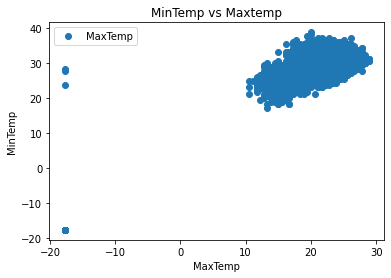

In [36]:
dataSet.plot(x='MinTemp',y='MaxTemp',style='o')
plt.title('MinTemp vs Maxtemp')
plt.xlabel('MaxTemp')
plt.ylabel('MinTemp')
plt.show()

In [39]:
dataSet['MinTemp'].values.reshape(-1,1)

array([[22.22222222],
       [21.66666667],
       [22.22222222],
       ...,
       [24.44444444],
       [26.66666667],
       [23.88888889]])

# Train and Test Spilitting

In [ ]:
X = data.drop("target", axis = 1)
y = data["target"]

In [46]:
X = dataSet['MaxTemp'].values.reshape(-1,1)
y = dataSet['MinTemp'].values.reshape(-1,1)

In [47]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

# Fitting

In [48]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

# Intercept and Coefficient

In [49]:
print(f"Intercept:{regressor.intercept_}")
print(f"Coefficient:{regressor.coef_}")

Intercept:[0.1718935]
Coefficient:[[0.73985312]]


# Prediction

In [54]:
y_pred = regressor.predict(X_test)

# Evaluation of Model

In [57]:
R2 = metrics.r2_score(y_test,y_pred)
print('R2:',R2)
n = X_test.shape[0]
p = X_test.shape[1]
print("Adjusted R2:",1-(1-R2)*(n-1)/(n-p-1))
print("Mean Absolute Eror:",metrics.mean_absolute_error(y_test,y_pred))
print("Mean Squared Error:",metrics.mean_squared_error(y_test,y_pred))
print("Root mean Squared Eror:",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

R2: 0.724165409038577
Adjusted R2: 0.7241072406305293
Mean Absolute Eror: 1.8508887969821772
Mean Squared Error: 5.563094450129226
Root mean Squared Eror: 2.358621302822737


In [60]:
ds = pd.DataFrame({'Actual':y_test.flatten(),'Predicted':y_pred.flatten()})
ds

,Actual,Predicted
0,26.666667,23.600576
1,22.777778,21.956458
2,21.111111,23.600576
3,21.666667,21.545428
4,22.777778,21.545428
...,...,...
4739,23.333333,23.189546
4740,22.777778,24.833664
4741,23.888889,21.545428
4742,21.111111,23.189546


# let's look at another examples